In [1]:
import pandas as pd

In [3]:
import datetime as dt

In [41]:
from NSEDownload import stocks
from datetime import datetime
stk_data = stocks.get_data(stock_symbol="TATACOFFEE", start_date='1-1-2023', end_date='1-1-2024')

In [42]:
# start = dt.datetime(2021,6,1)
# end = dt.datetime(2022,1,28)
# stk_data = gh(symbol='TATACOFFEE',start=start,end=end)


In [43]:
stk_data=stk_data[["Open Price","High Price","Low Price","Close Price"]]
# stk_data.to_csv("Tatacoffee13_21.csv")

In [44]:
column="Close Price"

In [45]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (277, 1)


In [46]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

263
X_train length: (263, 1)
X_test length: (14, 1)
y_train length: (263, 1)
y_test length: (14, 1)


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.6558998465387215
maPe-Testset: 0.6953072066787113
************
Trend=t
RMSE-Testset: 0.2020332710360271
maPe-Testset: 0.19455566589254264
************
Trend=c
RMSE-Testset: 0.4313214016697497
maPe-Testset: 0.45558660941361057
************
Trend=ct
RMSE-Testset: 0.21521295345424815
maPe-Testset: 0.20995813690044526
************


In [49]:
len(y_pred)

14

In [50]:
#i=1
td="t"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

Trend=t
RMSE-Testset: 0.16544468446044475
maPe-Testset: 0.13736365311169116
************


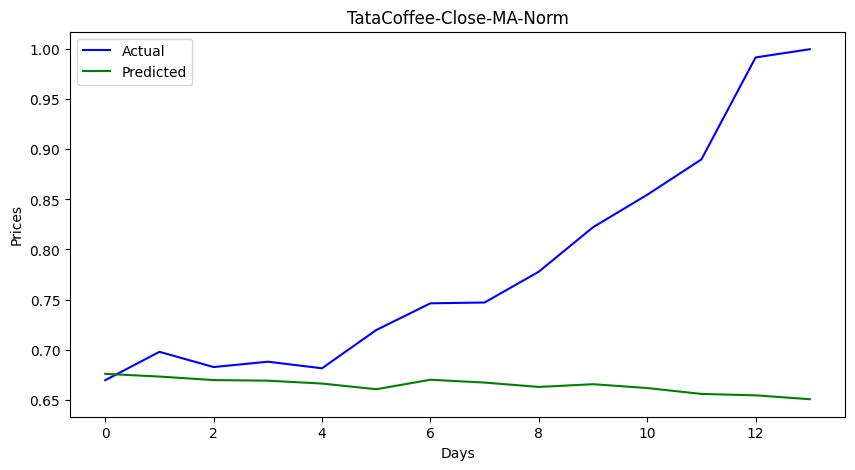

In [51]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [52]:
len(data1)

277

In [53]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [54]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

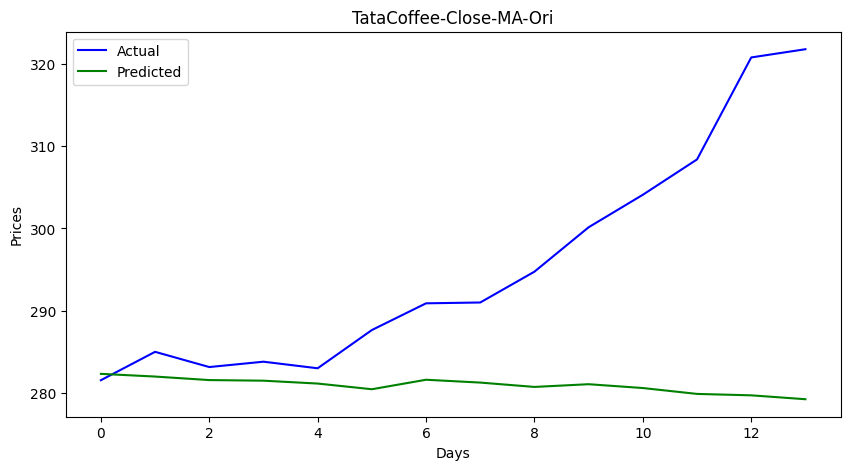

In [55]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [56]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 20.142890333059142
maPe-Testset: 0.047519821355447044


In [57]:
forecast=model_fit.predict(len(data1), len(data1))

In [58]:
forecast

array([0.6456749])

In [59]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [60]:
forecast_stock_price_test_oriF

,Closefore
0,278.660919


In [61]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)